## Read output of experiments

In [19]:
%pip install pandas -q
%pip install matplotlib -q
%pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# Remember to set the output path from your experiments.
base_df = pd.read_csv("../eval_output/gpt/shared_docs/single_output.csv")
template_df = pd.read_csv("../eval_output/gpt/shared_docs/multi_output.csv")
recap_df = pd.read_csv("../eval_output/gpt/shared_docs/recap_output.csv")
rag_df = pd.read_csv("../eval_output/gpt/shared_docs/rag_multi_output.csv")
cat_df = pd.read_csv("../eval_output/gpt/shared_docs/cat_multi_ouput.csv")
rag_cat_df = pd.read_csv("../eval_output/gpt/shared_docs/cat_rag_multi_ouput.csv")
only_cat_df = pd.read_csv("../eval_output/gpt/shared_docs/only_cat_output.csv")

In [21]:
score_columns = ['FAC_DOC', 'INF_DOC', 'REL_DOC', 'OVR_DOC']

In [22]:
def separate_score_columns(df):
    df_split = pd.json_normalize(df['Score_Unknown Role'].apply(eval))  # Convert string dict to actual dict
    df = pd.concat([df.drop(columns=['Score_Unknown Role']), df_split], axis=1)
    return df

Create score columns based on string dictionary "{'FAC_DOC': 5, 'INF_DOC': 4, 'REL_DOC': 5, 'OVR_DOC': 5}"

In [23]:
base_df = separate_score_columns(base_df)
template_df = separate_score_columns(template_df)
recap_df = separate_score_columns(recap_df)
rag_df = separate_score_columns(rag_df)
cat_df = separate_score_columns(cat_df)
rag_cat_df = separate_score_columns(rag_cat_df)
only_cat_df = separate_score_columns(only_cat_df)

In [24]:
# We just load the meeting that has shared documents (number_token_shared_docs > 0)
path = "token_data.csv"
df = pd.read_csv(path)
df = df[df["num_tokens_shared_doc"] > 0]
df.head()

,file,num_tokens_transcripts,num_tokens_summary,num_tokens_shared_doc
0,ES2004d.json,11420,176,131699
1,ES2008b.json,10489,153,133296
3,IS1004d.json,8416,203,14540
4,IS1008a.json,5233,161,7285
6,IS1004a.json,2565,179,14540


In [25]:
short_threshold = df['num_tokens_shared_doc'].quantile(0.33)
long_threshold = df['num_tokens_shared_doc'].quantile(0.66)
print(f"Short: < {short_threshold}, Medium: ≥ {short_threshold} < {long_threshold}, Long: ≥ {long_threshold}")

Short: < 7285.0, Medium: ≥ 7285.0 < 117904.0, Long: ≥ 117904.0


Get average score on all shared_docs experiment with full samples

In [26]:
base_averages = base_df[score_columns].mean()
rag_averages = rag_df[score_columns].mean()
template_averages = template_df[score_columns].mean()
recap_averages = recap_df[score_columns].mean()
cat_averages = cat_df[score_columns].mean()
rag_cat_averages = rag_cat_df[score_columns].mean()
only_cat_averages = only_cat_df[score_columns].mean()

averages_df = recap_averages.to_frame(name='Recap_Average_Score')
averages_df['Base_Average_Score'] = base_averages
averages_df['Template_Average_Score'] = template_averages
averages_df['Cat_Average_Score'] = cat_averages
averages_df['RAG_Average_Score'] = rag_averages
averages_df['RAG_Cat_Average_Score'] = rag_cat_averages
averages_df['Only_Cat_Average_Score'] = only_cat_averages
averages_df

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC_DOC,4.492537,4.895522,4.641791,4.820896,4.791045,4.850746,4.656716
INF_DOC,4.597015,4.820896,4.701493,4.776119,4.671642,4.791045,4.671642
REL_DOC,4.597015,4.805970,4.641791,4.746269,4.641791,4.656716,4.686567
OVR_DOC,4.597015,4.611940,4.432836,4.791045,4.686567,4.761194,4.626866


Get average score on all transcript experiment with full samples

In [27]:
import pandas as pd

base_df = pd.read_csv("../eval_output/gpt/transcript/single_output.csv")
template_df = pd.read_csv("../eval_output/gpt/transcript/multi_output.csv")
recap_df = pd.read_csv("../eval_output/gpt/transcript/recap_output.csv")
rag_df = pd.read_csv("../eval_output/gpt/transcript/rag_output.csv")
cat_df = pd.read_csv("../eval_output/gpt/transcript/cat_multi_ouput.csv")
rag_cat_df = pd.read_csv("../eval_output/gpt/transcript/cat_rag_multi_ouput.csv")
only_cat_df = pd.read_csv("../eval_output/gpt/transcript/only_cat_output.csv")

score_columns = ['FAC', 'INF', 'REL', 'OVR']

base_df = separate_score_columns(base_df)
template_df = separate_score_columns(template_df)
recap_df = separate_score_columns(recap_df)
rag_df = separate_score_columns(rag_df)
cat_df = separate_score_columns(cat_df)
rag_cat_df = separate_score_columns(rag_cat_df)
only_cat_df = separate_score_columns(only_cat_df)

base_averages = base_df[score_columns].mean()
rag_averages = rag_df[score_columns].mean()
template_averages = template_df[score_columns].mean()
recap_averages = recap_df[score_columns].mean()
cat_averages = cat_df[score_columns].mean()
rag_cat_averages = rag_cat_df[score_columns].mean()
only_cat_averages = only_cat_df[score_columns].mean()

averages_df1 = recap_averages.to_frame(name='Recap_Average_Score')
averages_df1['Base_Average_Score'] = base_averages
averages_df1['Template_Average_Score'] = template_averages
averages_df1['Cat_Average_Score'] = cat_averages
averages_df1['RAG_Average_Score'] = rag_averages
averages_df1['RAG_Cat_Average_Score'] = rag_cat_averages
averages_df1['Only_Cat_Average_Score'] = only_cat_averages
averages_df1

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,4.970149,3.955224,4.164179,4.567164,4.0,4.089552,4.432836
INF,5.000000,4.985075,5.000000,4.970149,5.0,5.000000,4.985075
REL,4.985075,4.940299,5.000000,4.850746,5.0,4.925373,4.791045
OVR,5.000000,4.985075,5.000000,4.910448,5.0,4.910448,4.910448


In [28]:
combined_avgs = pd.concat([averages_df1, averages_df], axis=0)
combined_avgs

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,4.970149,3.955224,4.164179,4.567164,4.000000,4.089552,4.432836
INF,5.000000,4.985075,5.000000,4.970149,5.000000,5.000000,4.985075
REL,4.985075,4.940299,5.000000,4.850746,5.000000,4.925373,4.791045
OVR,5.000000,4.985075,5.000000,4.910448,5.000000,4.910448,4.910448
FAC_DOC,4.492537,4.895522,4.641791,4.820896,4.791045,4.850746,4.656716
INF_DOC,4.597015,4.820896,4.701493,4.776119,4.671642,4.791045,4.671642
REL_DOC,4.597015,4.805970,4.641791,4.746269,4.641791,4.656716,4.686567
OVR_DOC,4.597015,4.611940,4.432836,4.791045,4.686567,4.761194,4.626866


In [29]:
scaled_avgs = combined_avgs/5
scaled_avgs

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,0.994030,0.791045,0.832836,0.913433,0.800000,0.817910,0.886567
INF,1.000000,0.997015,1.000000,0.994030,1.000000,1.000000,0.997015
REL,0.997015,0.988060,1.000000,0.970149,1.000000,0.985075,0.958209
OVR,1.000000,0.997015,1.000000,0.982090,1.000000,0.982090,0.982090
FAC_DOC,0.898507,0.979104,0.928358,0.964179,0.958209,0.970149,0.931343
INF_DOC,0.919403,0.964179,0.940299,0.955224,0.934328,0.958209,0.934328
REL_DOC,0.919403,0.961194,0.928358,0.949254,0.928358,0.931343,0.937313
OVR_DOC,0.919403,0.922388,0.886567,0.958209,0.937313,0.952239,0.925373


In [30]:
round(scaled_avgs*100, 2)

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,99.40,79.10,83.28,91.34,80.00,81.79,88.66
INF,100.00,99.70,100.00,99.40,100.00,100.00,99.70
REL,99.70,98.81,100.00,97.01,100.00,98.51,95.82
OVR,100.00,99.70,100.00,98.21,100.00,98.21,98.21
FAC_DOC,89.85,97.91,92.84,96.42,95.82,97.01,93.13
INF_DOC,91.94,96.42,94.03,95.52,93.43,95.82,93.43
REL_DOC,91.94,96.12,92.84,94.93,92.84,93.13,93.73
OVR_DOC,91.94,92.24,88.66,95.82,93.73,95.22,92.54


In [31]:
scaled_avgs

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,0.994030,0.791045,0.832836,0.913433,0.800000,0.817910,0.886567
INF,1.000000,0.997015,1.000000,0.994030,1.000000,1.000000,0.997015
REL,0.997015,0.988060,1.000000,0.970149,1.000000,0.985075,0.958209
OVR,1.000000,0.997015,1.000000,0.982090,1.000000,0.982090,0.982090
FAC_DOC,0.898507,0.979104,0.928358,0.964179,0.958209,0.970149,0.931343
INF_DOC,0.919403,0.964179,0.940299,0.955224,0.934328,0.958209,0.934328
REL_DOC,0.919403,0.961194,0.928358,0.949254,0.928358,0.931343,0.937313
OVR_DOC,0.919403,0.922388,0.886567,0.958209,0.937313,0.952239,0.925373


### Calulate the F1 Score between transcript & shared docs

In [32]:
# Compute averages for each metric pair
avg_fac = (2*scaled_avgs.loc['FAC'] * scaled_avgs.loc['FAC_DOC']) / (scaled_avgs.loc['FAC'] + scaled_avgs.loc['FAC_DOC'])
avg_inf = (2*scaled_avgs.loc['INF'] * scaled_avgs.loc['INF_DOC']) / (scaled_avgs.loc['INF'] + scaled_avgs.loc['INF_DOC'])
avg_rel = (2*scaled_avgs.loc['REL'] * scaled_avgs.loc['REL_DOC']) / (scaled_avgs.loc['REL'] + scaled_avgs.loc['REL_DOC'])
avg_ovr = (2*scaled_avgs.loc['OVR'] * scaled_avgs.loc['OVR_DOC']) / (scaled_avgs.loc['OVR'] + scaled_avgs.loc['OVR_DOC'])

# Create the output DataFrame with averaged scores
avg_df = pd.DataFrame({
    'Recap': [avg_fac['Recap_Average_Score'], avg_inf['Recap_Average_Score'], avg_rel['Recap_Average_Score'], avg_ovr['Recap_Average_Score']],
    'Base': [avg_fac['Base_Average_Score'], avg_inf['Base_Average_Score'], avg_rel['Base_Average_Score'], avg_ovr['Base_Average_Score']],
    'Template': [avg_fac['Template_Average_Score'], avg_inf['Template_Average_Score'], avg_rel['Template_Average_Score'], avg_ovr['Template_Average_Score']],
    'Cat': [avg_fac['Only_Cat_Average_Score'], avg_inf['Only_Cat_Average_Score'], avg_rel['Only_Cat_Average_Score'], avg_ovr['Only_Cat_Average_Score']],
    'Template & Cat': [avg_fac['Cat_Average_Score'], avg_inf['Cat_Average_Score'], avg_rel['Cat_Average_Score'], avg_ovr['Cat_Average_Score']],
    'RAG': [avg_fac['RAG_Average_Score'], avg_inf['RAG_Average_Score'], avg_rel['RAG_Average_Score'], avg_ovr['RAG_Average_Score']],
    'RAG & Cat': [avg_fac['RAG_Cat_Average_Score'], avg_inf['RAG_Cat_Average_Score'], avg_rel['RAG_Cat_Average_Score'], avg_ovr['RAG_Cat_Average_Score']]
}, index=['AVG_FAC', 'AVG_INF', 'AVG_REL', 'AVG_OVR'])

# Rename columns for clarity
avg_df.columns = ['Recap', 'Base', 'Template', 'Cat', 'Template & Cat', 'RAG', 'RAG & Cat']

print("\nOutput DataFrame (Averaged Scores):")
avg_df = round(avg_df*100, 2)
avg_df.to_csv("example_outputs/f1_out.csv")
avg_df


Output DataFrame (Averaged Scores):


,Recap,Base,Template,Cat,Template & Cat,RAG,RAG & Cat
AVG_FAC,94.39,87.51,87.80,90.84,93.81,87.20,88.75
AVG_INF,95.80,98.03,96.92,96.47,97.42,96.60,97.87
AVG_REL,95.66,97.44,96.28,94.76,95.96,96.28,95.75
AVG_OVR,95.80,95.83,93.99,95.29,97.00,96.76,96.69


### Calulate the Average Score between transcript & shared docs

In [33]:
# Compute averages for each metric pair
avg_fac = (scaled_avgs.loc['FAC'] + scaled_avgs.loc['FAC_DOC']) / 2
avg_inf = (scaled_avgs.loc['INF'] + scaled_avgs.loc['INF_DOC']) / 2
avg_rel = (scaled_avgs.loc['REL'] + scaled_avgs.loc['REL_DOC']) / 2
avg_ovr = (scaled_avgs.loc['OVR'] + scaled_avgs.loc['OVR_DOC']) / 2

# Create the output DataFrame with averaged scores
avg_df = pd.DataFrame({
    'Recap': [avg_fac['Recap_Average_Score'], avg_inf['Recap_Average_Score'], avg_rel['Recap_Average_Score'], avg_ovr['Recap_Average_Score']],
    'Base': [avg_fac['Base_Average_Score'], avg_inf['Base_Average_Score'], avg_rel['Base_Average_Score'], avg_ovr['Base_Average_Score']],
    'Template': [avg_fac['Template_Average_Score'], avg_inf['Template_Average_Score'], avg_rel['Template_Average_Score'], avg_ovr['Template_Average_Score']],
    'Cat': [avg_fac['Only_Cat_Average_Score'], avg_inf['Only_Cat_Average_Score'], avg_rel['Only_Cat_Average_Score'], avg_ovr['Only_Cat_Average_Score']],
    'Template & Cat': [avg_fac['Cat_Average_Score'], avg_inf['Cat_Average_Score'], avg_rel['Cat_Average_Score'], avg_ovr['Cat_Average_Score']],
    'RAG': [avg_fac['RAG_Average_Score'], avg_inf['RAG_Average_Score'], avg_rel['RAG_Average_Score'], avg_ovr['RAG_Average_Score']],
    'RAG & Cat': [avg_fac['RAG_Cat_Average_Score'], avg_inf['RAG_Cat_Average_Score'], avg_rel['RAG_Cat_Average_Score'], avg_ovr['RAG_Cat_Average_Score']]
}, index=['AVG_FAC', 'AVG_INF', 'AVG_REL', 'AVG_OVR'])

# Rename columns for clarity
avg_df.columns = ['Recap', 'Base', 'Template', 'Cat', 'Template & Cat', 'RAG', 'RAG & Cat']

print("\nOutput DataFrame (Averaged Scores):")
avg_df = round(avg_df*100, 2)
avg_df.to_csv("example_outputs/avg_out.csv")
avg_df


Output DataFrame (Averaged Scores):


,Recap,Base,Template,Cat,Template & Cat,RAG,RAG & Cat
AVG_FAC,94.63,88.51,88.06,90.90,93.88,87.91,89.40
AVG_INF,95.97,98.06,97.01,96.57,97.46,96.72,97.91
AVG_REL,95.82,97.46,96.42,94.78,95.97,96.42,95.82
AVG_OVR,95.97,95.97,94.33,95.37,97.01,96.87,96.72


## Visualize on line chart

In [34]:
def get_average_score_by_df(input_df):
    items_to_filter = list(df[df["num_tokens_shared_doc"]<short_threshold]["file"])
    # Filter the DataFrame

    # Filter the DataFrame
    short_df = input_df[input_df['Item'].isin(items_to_filter)]
    short_df

    averages = short_df[score_columns].mean()

    # Display the averages
    avg_df = averages.to_frame(name='Short_Average_Score')

    avg_df.head()

    # Get items where num_tokens_shared_doc is in the medium range
    items_to_filter = list(df[(df["num_tokens_shared_doc"] >= short_threshold) & 
                            (df["num_tokens_shared_doc"] < long_threshold)]["file"])

    medium_df = input_df[input_df['Item'].isin(items_to_filter)]
    medium_df

    averages = medium_df[score_columns].mean()

    # Display the averages
    avg_df['Medium_Average_Score'] = averages

    avg_df.head()

    # Get items where num_tokens_shared_doc is in the medium range
    items_to_filter = list(df[df["num_tokens_shared_doc"] >= long_threshold]["file"])
    # Filter the DataFrame
    long_df = input_df[input_df['Item'].isin(items_to_filter)]
    long_df

    averages = long_df[score_columns].mean()

    # Display the averages
    avg_df['Long_Average_Score'] = averages
    avg_df.head()
    return avg_df



In [35]:
import pandas as pd

base_df = pd.read_csv("../eval_output/gpt/shared_docs/single_output.csv")
template_df = pd.read_csv("../eval_output/gpt/shared_docs/multi_output.csv")
recap_df = pd.read_csv("../eval_output/gpt/shared_docs/recap_output.csv")
rag_df = pd.read_csv("../eval_output/gpt/shared_docs/rag_multi_output.csv")
cat_df = pd.read_csv("../eval_output/gpt/shared_docs/cat_multi_ouput.csv")
rag_cat_df = pd.read_csv("../eval_output/gpt/shared_docs/cat_rag_multi_ouput.csv")
only_cat_df = pd.read_csv("../eval_output/gpt/shared_docs/only_cat_output.csv")

score_columns = ['FAC_DOC', 'INF_DOC', 'REL_DOC', 'OVR_DOC']

base_df = separate_score_columns(base_df)
template_df = separate_score_columns(template_df)
recap_df = separate_score_columns(recap_df)
rag_df = separate_score_columns(rag_df)
cat_df = separate_score_columns(cat_df)
rag_cat_df = separate_score_columns(rag_cat_df)
only_cat_df = separate_score_columns(only_cat_df)

base_avg_df = get_average_score_by_df(base_df)
template_avg_df = get_average_score_by_df(template_df)
recap_avg_df = get_average_score_by_df(recap_df)
rag_avg_df = get_average_score_by_df(rag_df)
cat_avg_df = get_average_score_by_df(cat_df)
rag_cat_avg_df = get_average_score_by_df(rag_cat_df)
only_cat_avg_df = get_average_score_by_df(only_cat_df)

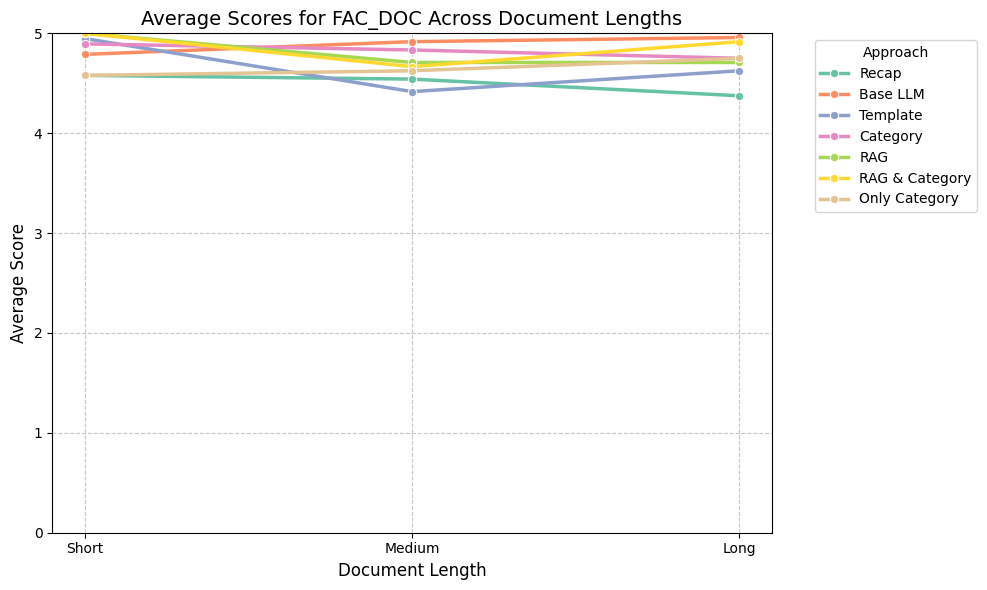

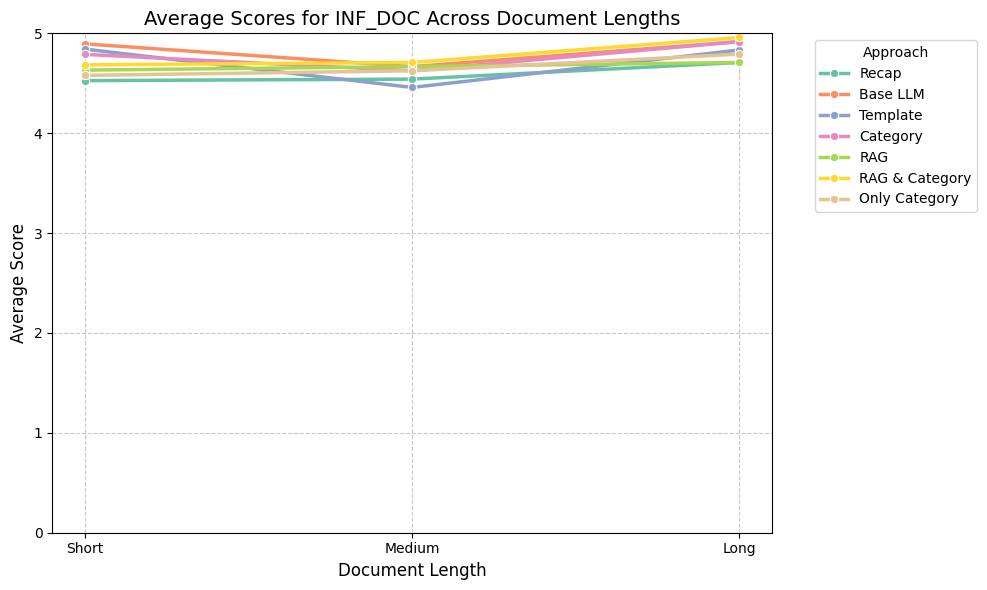

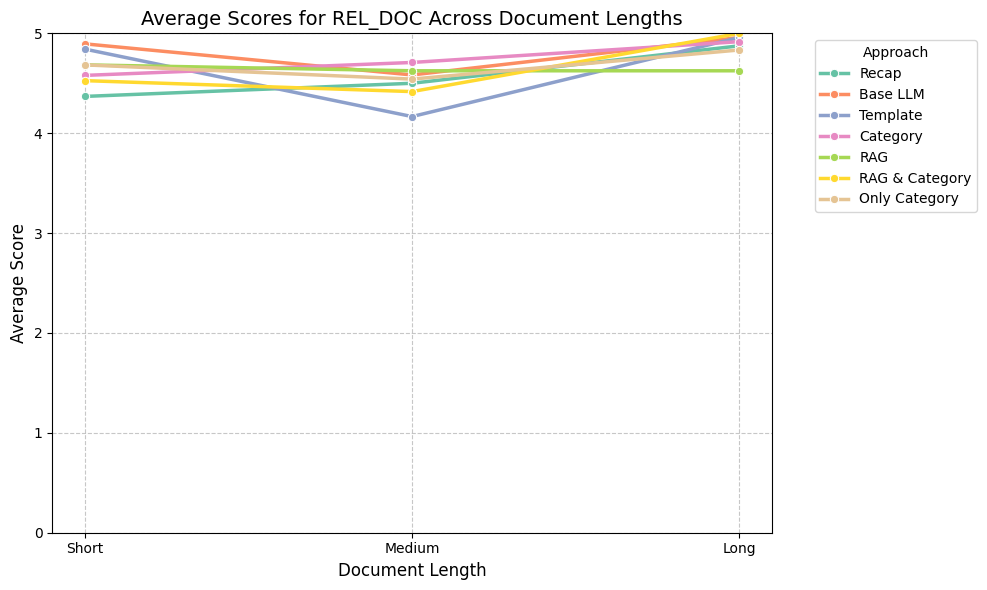

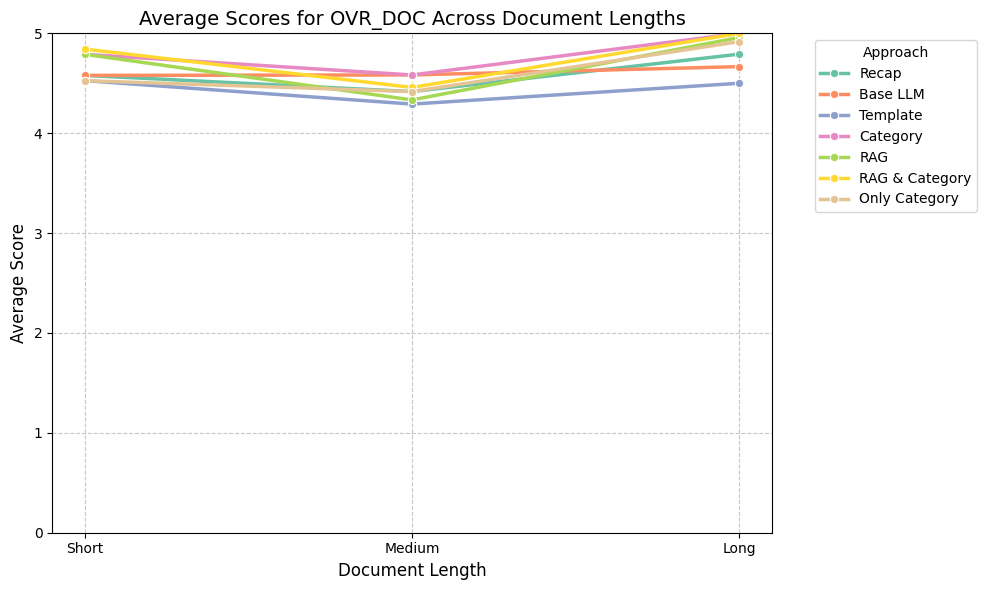

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is created earlier with this approach
approach_dfs = {
    'recap_avg_df': 'Recap',
    'base_avg_df': 'Base LLM',
    'template_avg_df': 'Template',
    'cat_avg_df': 'Category',
    'rag_avg_df': 'RAG',
    'rag_cat_avg_df': 'RAG & Category',
    'only_cat_avg_df': 'Only Category'
}

# Debug: Check which DataFrames exist
available_dfs = {}
for df_name in approach_dfs.keys():
    if df_name in globals():
        available_dfs[df_name] = globals()[df_name]
        available_dfs[df_name]['Approach'] = approach_dfs[df_name]
    else:
        print(f"Warning: '{df_name}' not found in global namespace. Skipping...")

# Combine only available DataFrames
combined_df = pd.concat([df for df in available_dfs.values()], ignore_index=False)

# Reset index to make Criterion a column
combined_df = combined_df.reset_index().rename(columns={'index': 'Criterion'})

# Melt the DataFrame into long format
df_melted = combined_df.melt(id_vars=['Approach', 'Criterion'], 
                             value_vars=['Short_Average_Score', 'Medium_Average_Score', 'Long_Average_Score'],
                             var_name='Length', value_name='Score')

# Clean up Length names
df_melted['Length'] = df_melted['Length'].replace({
    'Short_Average_Score': 'Short',
    'Medium_Average_Score': 'Medium',
    'Long_Average_Score': 'Long'
})

# Ensure Length is categorical with correct order
df_melted['Length'] = pd.Categorical(df_melted['Length'], categories=['Short', 'Medium', 'Long'], ordered=True)

# List of criteria to plot separately
criteria = ['FAC_DOC', 'INF_DOC', 'REL_DOC', 'OVR_DOC']

# Create separate line plots for each criterion
for criterion in criteria:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.lineplot(data=df_melted[df_melted['Criterion'] == criterion], 
                 x='Length', y='Score', hue='Approach', 
                 marker='o', palette='Set2', linewidth=2.5)
    
    # Customize each plot
    plt.ylim(0, 5)  # Adjust y-axis to focus on score range (4-5.5)
    plt.title(f'Average Scores for {criterion} Across Document Lengths', fontsize=14)
    plt.xlabel('Document Length', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.legend(title='Approach', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()